#Group Project
This is a group assignment where students will compete to take on a Data Science Challenge. Each team is tasked with the goal of developing a neural network model capable of discriminating between real and fake examples of the popular "Astronomy Picture of the Day" (APOD). You will work together to research a viable model to train, build a processing pipeline to prepare the images in the dataset, train your chosen model to determine whether a supplied image is real or fake, and finally submit your saved model along with a short report describing the methodology used.There will be three datasets related to this assignment. All three datasets will include images which are drawn from a sample of real APODs, and fake images that have been made to mimic the real thing. Along with the images, you will also receive a file which denotes whether each image is real or fake.The first of the datasets will be the training set, which contains 5000 real and 2000 fake images. This dataset should be used to train your chosen model.The second dataset is a validation set, containing 1510 real and 673 fake images. This set is provided for you to test your models on previously unseen data.The final dataset is a secret testing set, containing 1510 real and 704 fake images. This dataset will not be released to the teams, but will be used by the module team to evaluate the quality of the models you submit.


#Group No. : 01
# Group Members

1.   Anam Nasir(21031975)
2.   Nazrin Thanikattil Rafeeque(21031314)
3.   Omparkash Majoju (20062188)
4.   Paul Francis(21034542)



#Required Modules

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import models, layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, Input,Reshape,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
import os
import PIL
import pathlib
from sklearn import metrics
import seaborn

#Read directories (Training and Validation)

In [2]:
import tensorflow as tf
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!mkdir /content/Train
!unzip /content/drive/MyDrive/APOD_Train.zip -d /content/Train
import pathlib
data_dir = pathlib.Path('/content/Train/APOD_Train')

Streaming output truncated to the last 5000 lines.
  inflating: /content/Train/APOD_Train/Real/ap100207.jpg  
  inflating: /content/Train/__MACOSX/APOD_Train/Real/._ap100207.jpg  
  inflating: /content/Train/APOD_Train/Real/ap080413.jpg  
  inflating: /content/Train/__MACOSX/APOD_Train/Real/._ap080413.jpg  
  inflating: /content/Train/APOD_Train/Real/ap140623.jpg  
  inflating: /content/Train/__MACOSX/APOD_Train/Real/._ap140623.jpg  
  inflating: /content/Train/APOD_Train/Real/ap121222.jpg  
  inflating: /content/Train/__MACOSX/APOD_Train/Real/._ap121222.jpg  
  inflating: /content/Train/APOD_Train/Real/ap131031.jpg  
  inflating: /content/Train/__MACOSX/APOD_Train/Real/._ap131031.jpg  
  inflating: /content/Train/APOD_Train/Real/ap140810.jpg  
  inflating: /content/Train/__MACOSX/APOD_Train/Real/._ap140810.jpg  
  inflating: /content/Train/APOD_Train/Real/ap031025.jpg  
  inflating: /content/Train/__MACOSX/APOD_Train/Real/._ap031025.jpg  
  inflating: /content/Train/APOD_Train/Real/ap

In [9]:
!mkdir /content/Validation
!unzip /content/drive/MyDrive/APOD_Valid.zip -d /content/Validation
import pathlib
data_dir1 = pathlib.Path('/content/Validation/APOD_Valid')

Archive:  /content/drive/MyDrive/APOD_Valid.zip
   creating: /content/Validation/APOD_Valid/
  inflating: /content/Validation/__MACOSX/._APOD_Valid  
  inflating: /content/Validation/APOD_Valid/.DS_Store  
  inflating: /content/Validation/__MACOSX/APOD_Valid/._.DS_Store  
   creating: /content/Validation/APOD_Valid/Real/
  inflating: /content/Validation/__MACOSX/APOD_Valid/._Real  
   creating: /content/Validation/APOD_Valid/Fake/
  inflating: /content/Validation/__MACOSX/APOD_Valid/._Fake  
  inflating: /content/Validation/APOD_Valid/Real/ap991031.jpg  
  inflating: /content/Validation/__MACOSX/APOD_Valid/Real/._ap991031.jpg  
  inflating: /content/Validation/APOD_Valid/Real/ap981222.jpg  
  inflating: /content/Validation/__MACOSX/APOD_Valid/Real/._ap981222.jpg  
  inflating: /content/Validation/APOD_Valid/Real/ap980128.jpg  
  inflating: /content/Validation/__MACOSX/APOD_Valid/Real/._ap980128.jpg  
  inflating: /content/Validation/APOD_Valid/Real/ap991025.jpg  
  inflating: /content/

#To check image shape

In [4]:
import cv2
cv2.imread('Train//APOD_Train//Fake//1636371984_01409.png').shape

(256, 256, 3)

#Some Images Visualization using PIL (from pillow)

In [5]:
import os
import PIL
train_dir = pathlib.Path(data_dir )

train_real = list(train_dir.glob("Real/*"))
train_fake = list(train_dir.glob("Fake/*"))

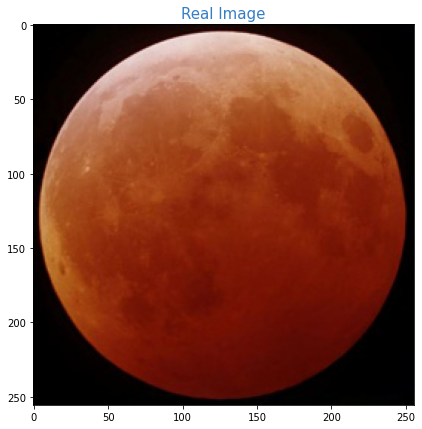

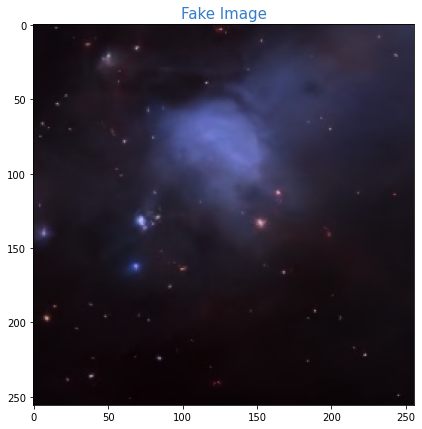

In [6]:
img1 = PIL.Image.open(train_real[50])
plt.figure(figsize=(7,7))
plt.title("Real Image",fontsize=15,color="#357EC7")
plt.imshow(img1)

img2 = PIL.Image.open(train_fake[22])
plt.figure(figsize=(7,7))
plt.title("Fake Image",fontsize=15,color="#357EC7")
plt.imshow(img2)

#Create Dataset using directory and Preprocessing Pipeline
using the directories we will create the dataset.Then split the APOD_train into train_ds and valid_ds to train for model training and then use the APOD_Valid to test the data as test_ds.
Also , we can use the prefetch and cache methods on the dataset to improve the performance of the training loop..prefetch() method allows you to pre-fetch data to the GPU, so that the GPU can keep working on the next batch of data while the CPU is preparing the current batch. This can help to reduce the training time..cache() method allows you to cache the dataset to memory, so that the data does not need to be preprocessed each time the training loop is run. This can also help to reduce the training time.

In [11]:
# Define some Important Variables
img_height = 224
img_width = 224
IMG_SIZE = (img_height,img_width)
BATCH_SIZE = 128
EPOCHS = 10

In [12]:
data_dir = pathlib.Path('/content/Train/APOD_Train')
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir, 
    batch_size= (BATCH_SIZE),
    seed = 2,
    image_size=(IMG_SIZE), 
    validation_split=0.1,
    subset= 'training',
    )
train_ds = train_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

valid_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir, 
    batch_size=(BATCH_SIZE),
    seed = 2,
    image_size=(IMG_SIZE), 
    validation_split=0.1,
    subset= 'validation',
    )
valid_ds = valid_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
data_dir1 = pathlib.Path('/content/Validation/APOD_Valid')
test_ds = tf.keras.utils.image_dataset_from_directory(
data_dir1,
batch_size=(BATCH_SIZE),
image_size=(IMG_SIZE),
subset= None,
)
test_ds = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)


Found 7000 files belonging to 2 classes.
Using 6300 files for training.
Found 7000 files belonging to 2 classes.
Using 700 files for validation.
Found 2183 files belonging to 2 classes.


In [13]:
valid_ds

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

#Model Architecture(ResNet50 )
ResNet50 is a deep residual network and it is considered to be one of the best architectures for image classification.Below code loads the pre-trained ResNet50 model with weights trained on the ImageNet dataset, and removes the fully connected layers at the top of the network. Then, it adds a global spatial average pooling layer and a fully connected layer with a single unit and a sigmoid activation function, which is used for binary classification.

In [14]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model

# Load the pre-trained ResNet50 model
resnet50_model = ResNet50(weights='imagenet', include_top=False, input_shape=IMG_SIZE+(3,))

# Freeze all layers of the pre-trained model
for layer in resnet50_model.layers:
    layer.trainable = False

# Add a global spatial average pooling layer
x = resnet50_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
# Add a fully connected layer for binary classification
x = Dense(1, activation='sigmoid')(x)
# Create the new model
resnet50_New = Model(inputs=resnet50_model.input, outputs=x)

# UnFreeze some of the Top layers
for layer in resnet50_model.layers:
    layer.trainable = True


94765736/94765736 [==============================] - 5s 0us/step


#Summary of Model

In [15]:
#summary of model
resnet50_New.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

#Compile the Model

In [18]:
#Compile the model
from torch.optim import SGD
resnet50_New.compile(optimizer=SGD('learning_rate' = 0.001, momentum=0.9), loss='binary_crossentropy', metrics=['accuracy']) 

SyntaxError: ignored

In [21]:
from torch.optim import SGD

# Compile the model
resnet50_New.compile(optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9, nesterov=True),
                     loss='binary_crossentropy', metrics=['accuracy'])

NameError: ignored

In [23]:
from tensorflow.keras import optimizers

# Initialize the model and the optimizer
model = resnet50_New
optimizer = optimizers.SGD(learning_rate=0.01)

# Use the optimizer to update the model's parameters
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


#Train the Model

Below code  trains the ResNet_50 model for 30 epochs using the train_dataset and valid_dataset as input. The fit() method returns a history object which contains the training and validation loss and accuracy for each epoch, which you can use to plot the training progress or check the performance of the model.

In [24]:
# Train the model
history = resnet50_New.fit(train_ds, epochs=10, validation_data=valid_ds)

Epoch 1/10
50/50 [==============================] - 83s 1s/step - loss: 0.3494 - accuracy: 0.8402 - val_loss: 0.3014 - val_accuracy: 0.8614
Epoch 2/10
50/50 [==============================] - 61s 1s/step - loss: 0.1513 - accuracy: 0.9460 - val_loss: 0.1988 - val_accuracy: 0.9157
Epoch 3/10
50/50 [==============================] - 62s 1s/step - loss: 0.0881 - accuracy: 0.9692 - val_loss: 0.1556 - val_accuracy: 0.9414
Epoch 4/10
50/50 [==============================] - 61s 1s/step - loss: 0.0524 - accuracy: 0.9832 - val_loss: 0.1044 - val_accuracy: 0.9614
Epoch 5/10
50/50 [==============================] - 62s 1s/step - loss: 0.0340 - accuracy: 0.9916 - val_loss: 0.1411 - val_accuracy: 0.9486
Epoch 6/10
50/50 [==============================] - 62s 1s/step - loss: 0.0236 - accuracy: 0.9944 - val_loss: 0.0778 - val_accuracy: 0.9714
Epoch 7/10
50/50 [==============================] - 62s 1s/step - loss: 0.0166 - accuracy: 0.9983 - val_loss: 0.0783 - val_accuracy: 0.9729
Epoch 8/10
50/50 [==

In [25]:
# check the values available in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


#Save the Model

In [35]:
# Save the model in HDF5 format
resnet50_New.save('/content/drive/MyDrive/Group1_Trained.h5')

In [36]:
# Test saved model

loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/Group1_Trained.h5')
loaded_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [37]:
# zip the model
!zip -r //content/drive/MyDrive/Group1_Trained.h5.zip /content/drive/MyDrive/Group1_Trained.h5

  adding: content/drive/MyDrive/Group1_Trained.h5 (deflated 8%)


#Plots of the loss and metric curves

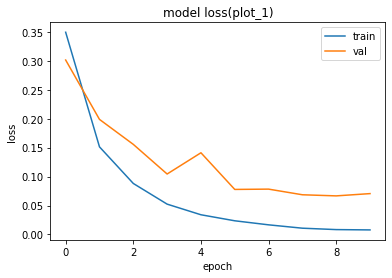

In [28]:
#Plot losses 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss(plot_1)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()
plt.show()

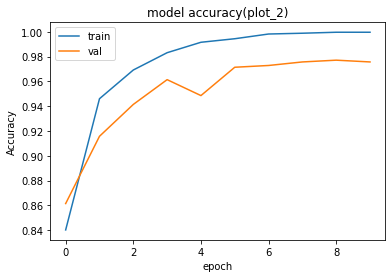

In [29]:
#plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy(plot_2)')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()
plt.show()

#To Check the test accuracy

In [30]:
test_loss, test_acc = resnet50_New.evaluate(test_ds)
print('Test accuracy:', test_acc)

18/18 [==============================] - 7s 365ms/step - loss: 0.1171 - accuracy: 0.9574
Test accuracy: 0.9573980569839478
